In [ ]:
#rahul Patil OG
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

In [ ]:
# Pre Processing of the data
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Train"
categories = ['Chickenpox','Cowpox','Healthy','HFMD','Measles','Monkeypox']

for category in categories:
  class_index=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)

In [3]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [4]:
# Final dataframe after pre-processing
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.299009,0.232342,0.204891,0.320891,0.248421,0.223872,0.346540,0.271114,0.246669,0.363680,...,0.432232,0.326350,0.283213,0.415833,0.309950,0.266813,0.404891,0.299009,0.255872,Chickenpox
1,0.949259,0.929651,0.917887,0.949272,0.932566,0.920801,0.951109,0.938170,0.925489,0.944394,...,0.640131,0.475425,0.389150,0.634275,0.469569,0.383294,0.628420,0.463714,0.377440,Chickenpox
2,0.757877,0.651995,0.577485,0.743983,0.638100,0.563591,0.728499,0.622617,0.546276,0.725492,...,0.727379,0.637493,0.546120,0.760771,0.664614,0.555833,0.740160,0.641153,0.526411,Chickenpox
3,0.662745,0.568627,0.458824,0.662745,0.568627,0.458824,0.663661,0.567712,0.458824,0.666667,...,0.492082,0.371168,0.284632,0.522844,0.380650,0.277671,0.546160,0.395156,0.283369,Chickenpox
4,0.969741,0.972694,0.950133,0.999997,0.999995,0.974582,0.993355,0.977188,0.940979,0.868971,...,0.984966,0.981960,0.965358,0.967609,0.967608,0.963844,0.955847,0.955847,0.963689,Chickenpox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.704906,0.630394,0.465689,0.700502,0.617288,0.455483,0.682777,0.595586,0.434802,0.665255,...,0.060781,0.094118,0.104900,0.057842,0.091179,0.101962,0.057842,0.091178,0.101961,Monkeypox
533,0.564706,0.352941,0.172549,0.567608,0.355843,0.175451,0.574327,0.360731,0.179423,0.584049,...,0.641362,0.386460,0.166852,0.657909,0.403007,0.183399,0.663714,0.408812,0.189204,Monkeypox
534,0.729412,0.541176,0.454902,0.726510,0.538274,0.452000,0.719964,0.531729,0.445454,0.711141,...,0.341178,0.149020,0.121569,0.345098,0.152940,0.125489,0.345098,0.152941,0.125490,Monkeypox
535,0.243938,0.150835,0.088580,0.311101,0.211444,0.145545,0.396983,0.293364,0.223381,0.476861,...,0.731361,0.586263,0.511753,0.796302,0.651204,0.576694,0.825466,0.680368,0.605858,Monkeypox


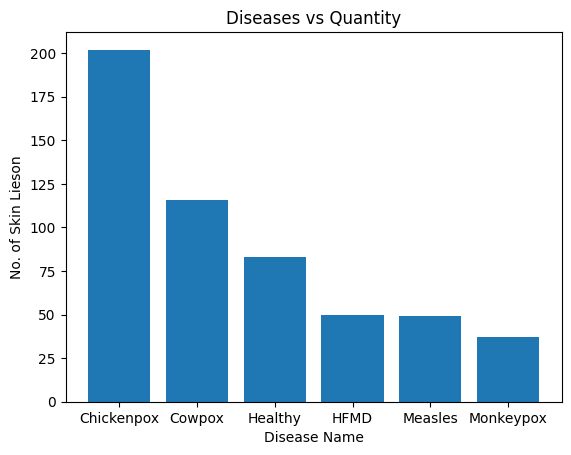

In [5]:
# Display of the number of images of each flower type
plt.bar(categories,df['Target'].value_counts())
plt.title('Diseases vs Quantity')
plt.xlabel('Disease Name')
plt.ylabel('No. of Skin Lieson')
plt.show()

In [6]:
# Input and Output 
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

In [7]:
#Classification of images using KNN Classification Algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,160)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159])})

In [8]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': np.int64(13)}

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = KNeighborsClassifier(n_neighbors=16,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [11]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Chickenpox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Chickenpox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Mo

In [12]:
# Actual output
y_test

array(['Healthy', 'Monkeypox', 'HFMD', 'Monkeypox', 'Monkeypox', 'HFMD',
       'Monkeypox', 'HFMD', 'Measles', 'Healthy', 'HFMD', 'Cowpox',
       'Monkeypox', 'Monkeypox', 'Healthy', 'Monkeypox', 'Monkeypox',
       'HFMD', 'Monkeypox', 'Cowpox', 'Healthy', 'Monkeypox', 'Healthy',
       'Monkeypox', 'HFMD', 'Monkeypox', 'HFMD', 'Measles', 'Chickenpox',
       'Chickenpox', 'HFMD', 'Healthy', 'HFMD', 'Monkeypox', 'Chickenpox',
       'Healthy', 'Monkeypox', 'Healthy', 'HFMD', 'Monkeypox', 'Healthy',
       'Monkeypox', 'HFMD', 'Healthy', 'HFMD', 'Monkeypox', 'Monkeypox',
       'Healthy', 'Monkeypox', 'Healthy', 'Monkeypox', 'Healthy',
       'Chickenpox', 'Monkeypox', 'Monkeypox', 'Cowpox', 'Chickenpox',
       'Chickenpox', 'Cowpox', 'Monkeypox', 'Monkeypox', 'Measles',
       'Cowpox', 'Monkeypox', 'HFMD', 'Cowpox', 'Measles', 'HFMD',
       'Cowpox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'HFMD',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'HFMD

In [13]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  39.25925925925926 %


In [14]:
#Confusion matrix and Classification report
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 0,  0,  3,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0],
       [10,  9, 26, 21, 11, 53]])

In [15]:
# Classification report
from sklearn import metrics
metrics.classification_report(y_test,y_pred)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

'              precision    recall  f1-score   support\n\n  Chickenpox       0.00      0.00      0.00        10\n      Cowpox       0.00      0.00      0.00         9\n        HFMD       0.00      0.00      0.00        29\n     Healthy       0.00      0.00      0.00        21\n     Measles       0.00      0.00      0.00        11\n   Monkeypox       0.41      0.96      0.57        55\n\n    accuracy                           0.39       135\n   macro avg       0.07      0.16      0.10       135\nweighted avg       0.17      0.39      0.23       135\n'

In [28]:
import joblib
filename = 'KNN_Mpox.pkl'
joblib.dump(model, filename)

['KNN_Mpox.pkl']

In [29]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)

In [30]:
#prediction Of new image 
img_path1 = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Test\Chickenpox\CHP_19_01.jpg"    # Chickenpox
img_path2 = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Test\Healthy\HEALTHY_98_01.jpg" # Healthy
img_path3 = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Test\Measles\MSL_23_01.jpg" # Measles
img_path4 = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Test\Cowpox\CWP_09_01.jpg" # Cowpox


In [34]:
import cv2
# custom function to predict label
def predict_label(path):
    
    # image read from path & resize
    img_arr = cv2.imread(path)
    img_arr = cv2.resize(img_arr,(150,150))
    
    # normalisation & re-shaping
    img_arr = img_arr / 255.0
    nx, ny, nrgb = img_arr.shape
    img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))
    
    # prediction
    custom_pred = model.predict(img_arr2)
    
    # predict the label
    print(f"The predicted label for the custom image is: {custom_pred[0]}\n")
    
    # plot the image & predicted label
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(5,5)
    fig.tight_layout()
    image = plt.imread(path)
    plt.imshow(image)
    plt.axis('off')
    plt.title("predicted label: " + custom_pred[0])

The predicted label for the custom image is: Monkeypox



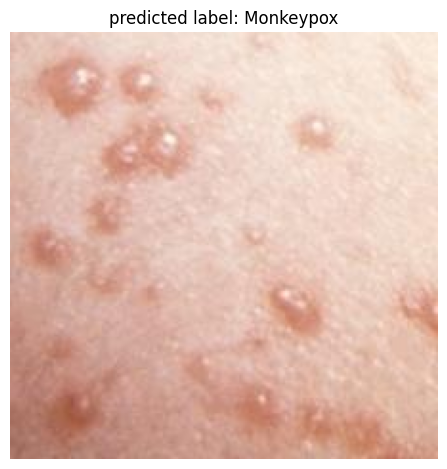

In [35]:
predict_label(img_path1)

The predicted label for the custom image is: Monkeypox



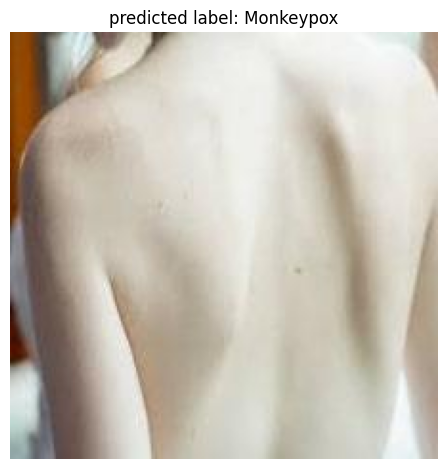

In [36]:
predict_label(img_path2)

The predicted label for the custom image is: Monkeypox



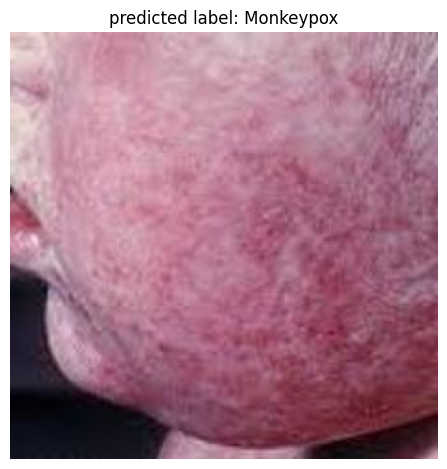

In [37]:
predict_label(img_path3)

The predicted label for the custom image is: Monkeypox



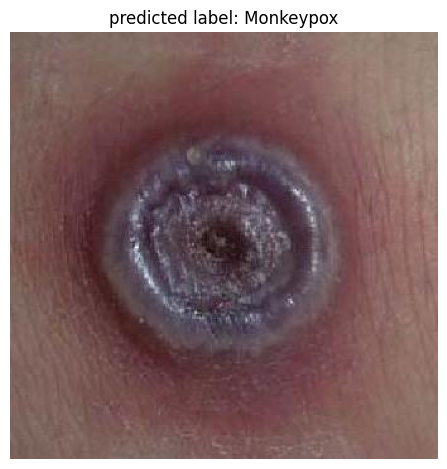

In [38]:
predict_label(img_path4)